In [1]:
import pandas as pd
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from pylab import cm
import seaborn as sns

from my_functions import find_min_distance

In [2]:
range_px = 308 
px_size = 0.1625


#specify filepaths to the directories where pooled data is stored
directories = ['baz_pc//', 'baz_ooplasm//', 'par1_pc//', 'par1_baz_pc//', 'baz_jup_non-pc_PFCs//', 'par1_jup_main_body//', 'par1_jup_pc_long//', 'par1_long//']

#specify which directories contain data for both channels, and which contain data for only one channel
one_channel = ['baz_pc//', 'baz_ooplasm//', 'par1_pc//', 'baz_jup_non-pc_PFCs//', 'par1_jup_main_body//', 'par1_long//']
two_channels = ['par1_baz_pc//', 'par1_jup_pc_long//']





In [3]:
def concatanate_data(df_profile_all, df_profile_norm_all, df_profile, df_distances, range, colname):
    
    reference_coordinates = df_distances[0:1]
    reference_coordinates = [reference_coordinates[i][0] for i in reference_coordinates.columns]
    df_distances = df_distances[1:]
    position_pc = find_min_distance(df_distances, reference_coordinates)
    
    df_profile = df_profile[(position_pc-range):(position_pc+range)]
    df_profile.reset_index(drop=True, inplace=True)
    df_profile_all[colname] = df_profile
    df_profile_norm_all[colname] = (df_profile-min(df_profile))/max(df_profile-min(df_profile))
    return df_profile_all, df_profile_norm_all

In [4]:
for directory in directories:
    files = listdir(directory)

    if directory in one_channel:
        increment = 4
        timepoints = [0]
    elif directory in two_channels:
        increment = 6
        timepoints = [3, 0]
    else:
        raise ValueError(f'Unknow directory type for directory {directory}')

    for timepoint in timepoints:
        profile_first_all = pd.DataFrame()
        profile_second_all = pd.DataFrame()
        profile_first_all_normalized = pd.DataFrame()
        profile_second_all_normalized = pd.DataFrame()

        for ind, file in enumerate(files[0::increment]):

            if increment == 6:
                xy_data_first = pd.read_csv(directory+files[ind*increment+timepoint+2], sep='\t', header=None)
                xy_data_second = xy_data_first
                profile_first = pd.read_csv(directory+files[ind*increment+timepoint+1], sep='\t').Mean.dropna()
                profile_first_name = files[ind*increment+timepoint+1][:-4]
                profile_second = pd.read_csv(directory+files[ind*increment+timepoint], sep='\t').Mean.dropna()
                profile_second_name = files[ind*increment+timepoint][:-4]       
            else:
                xy_data_first = pd.read_csv(directory+files[ind*increment+3], sep='\t', header=None)
                xy_data_second = pd.read_csv(directory+files[ind*increment+1], sep='\t', header=None)
                profile_first = pd.read_csv(directory+files[ind*increment+2], sep='\t').Mean.dropna()
                profile_first_name = files[ind*increment+2][:-4]
                profile_second = pd.read_csv(directory+files[ind*increment], sep='\t').Mean.dropna()
                profile_second_name = files[ind*increment][:-4]


            profile_first_all, profile_first_all_normalized = concatanate_data(profile_first_all, profile_first_all_normalized, profile_first, xy_data_first, range_px, profile_first_name)
 

            profile_second_all, profile_second_all_normalized = concatanate_data(profile_second_all, profile_second_all_normalized, profile_second, xy_data_second, range_px, profile_second_name)



            ## Save results to csv files
            result = pd.concat([profile_first_all_normalized, profile_second_all_normalized], axis=1)

            file_name=directory[:-2]
            if increment==6:
                if timepoint == 0: file_name+='_after'
                else: file_name+= '_before'

            result.to_csv('results/' + file_name + '.csv', index=False)


        

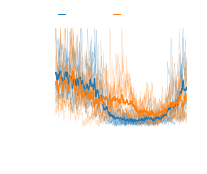

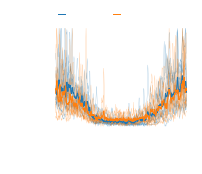

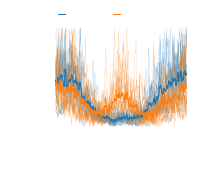

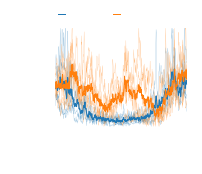

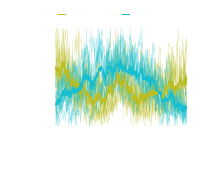

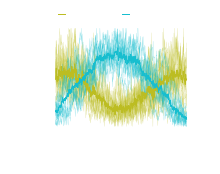

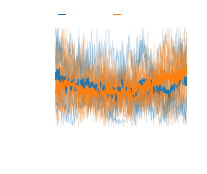

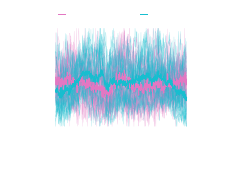

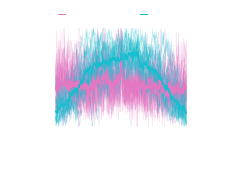

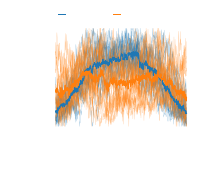

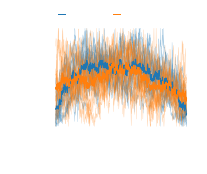

In [8]:
## Plotting
COLOR = 'white'
#COLOR = 'white'
plot_size="small"
#plot_size="big"





files = listdir('results//')
for file in files:
    if 'after' in file:
        title = 'After ablation'
        if 'par1_baz' in file:
            label_first = 'Bazooka'
            label_second = 'Par-1'
            if COLOR=="black":
                col_first = sns.color_palette()[-2]
                col_second = sns.color_palette()[-1]
            else: 
                col_first = sns.color_palette("tab10")[-2]
                col_second = sns.color_palette("tab10")[-1]
        elif 'par1_jup' in file:
            label_first = 'Microtubules'
            label_second = 'Par-1'
            if COLOR=="black":
                col_first = sns.color_palette()[-4] 
                col_second = sns.color_palette()[-1]    
            else:
                col_first = sns.color_palette("tab10")[-4] 
                col_second = sns.color_palette("tab10")[-1]       
            
    elif 'before' in file: title = 'Before ablation'
    else:
        title= file[:-4]
        label_first = 'Before'
        label_second = 'After'
        #col_first = 'magenta'
        #col_second = 'lime'
        #col_first = sns.color_palette("tab10")[0]
        #col_second = sns.color_palette("tab10")[1]
        if COLOR == "black":
            col_first = sns.color_palette()[0]
            col_second = sns.color_palette()[1]
        else:
            col_first = sns.color_palette("tab10")[0]
            col_second = sns.color_palette("tab10")[1]

    title= file[:-4]

    # Edit the font, font size, color and axes width
    mpl.rcParams['font.family'] = 'Arial'


    if plot_size == "small":
        plt.rcParams['font.size'] = 10
        plt.rcParams['axes.linewidth'] = 0.5
        fig_width=2
        fig_height=1.5
        tick_size=3
        
    else:
        plt.rcParams['font.size'] = 18
        plt.rcParams['axes.linewidth'] = 1
        fig_width=5
        fig_height=4
        tick_size=7


    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['axes.edgecolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR

    # Make text editable in illustrator
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42

    # Create figure object and store it in a variable called 'fig'
    fig = plt.figure(figsize=(fig_width, fig_height))

    # Add axes object to the figure that takes up entire figure
    ax = fig.add_axes([0, 0, 1, 1])

    # Edit the major and minor ticks of the x and y axes
    ax.xaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')

    # Add the x and y-axis labels
    ax.set_xlabel(r'Position ($\mathregular{\mu}$m)', labelpad=10)
    ax.set_ylabel('Normalized Intensity', labelpad=10)


    # Load data
    df = pd.read_csv('results//' + file)
    profile_first = df.iloc[:,:int(-df.shape[1]/2)]
    profile_second = df.iloc[:,int(-df.shape[1]/2):]
    x_axis = np.arange(-len(df)/2, len(df)/2, 1)*px_size

    for colname in profile_first:
        ax.plot(x_axis, profile_first[colname], linewidth=plt.rcParams['axes.linewidth']/2, color=col_first, alpha=0.5)

    for colname in profile_second:
        ax.plot(x_axis, profile_second[colname], linewidth=plt.rcParams['axes.linewidth']/2, color=col_second, alpha=0.5)


    mean_first = profile_first.apply(lambda row : np.mean(row), axis = 1)
    ax.plot(x_axis, mean_first, linewidth=plt.rcParams['axes.linewidth']*2, color=col_first, label=label_first)

    mean_second = profile_second.apply(lambda row : np.mean(row), axis = 1)
    ax.plot(x_axis, mean_second, linewidth=plt.rcParams['axes.linewidth']*2, color=col_second, label=label_second)

    handles = ax.get_legend_handles_labels()[0]
    num = len(profile_second.columns)
    patch_sample_size = mpatches.Patch(color='white', label='n='+str(num))
    handles.append(patch_sample_size)
    legend = ax.legend(handles=handles,bbox_to_anchor=(0, 1.2), loc='upper left', prop={'size': plt.rcParams['font.size']}, framealpha=0, ncol=len(handles), columnspacing=1, handlelength=0.7)

    
    #ax.text(35, 1.2, 'n='+str(num), size=plt.rcParams['font.size'])

    #plt.title(title)


    fig.savefig(f'{title}_{COLOR}_{plot_size}.pdf', dpi=300, transparent=True, bbox_inches='tight')
    fig.savefig(f'{title}_{COLOR}_{plot_size}.png', dpi=300, transparent=True, bbox_inches='tight')

In [6]:
#fig.savefig('Final_Plot.pdf', dpi=300, transparent=True, bbox_inches='tight')
#fig.savefig('Final_Plot.png', dpi=300, transparent=True, bbox_inches='tight')

In [7]:
legend.get_window_extent()

Bbox([[5.0, 107.6], [150.75, 124.6]])